In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df = pd.read_csv("files/constituents-financials_csv.csv")
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


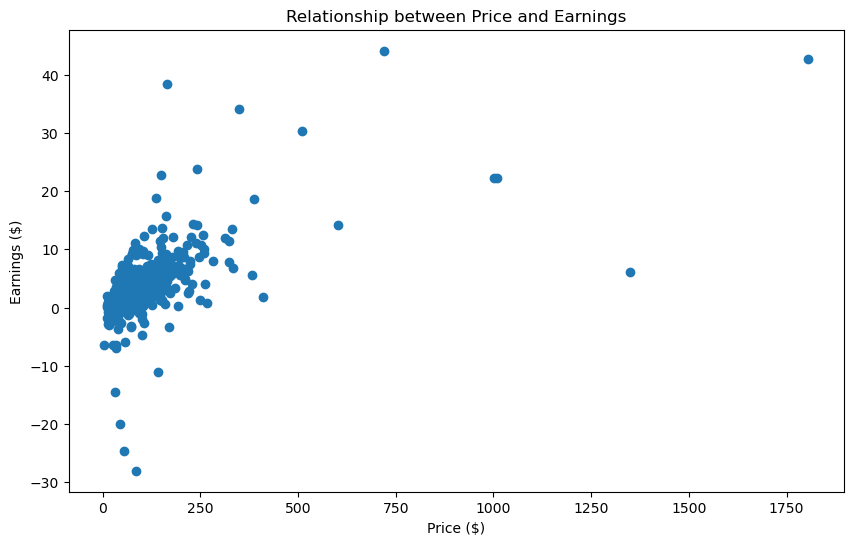

In [3]:
plt.figure(figsize=[10,6])
plt.scatter(df["Price"], df["Earnings/Share"])
plt.title("Relationship between Price and Earnings")
plt.ylabel("Earnings ($)")
plt.xlabel("Price ($)")
plt.show()

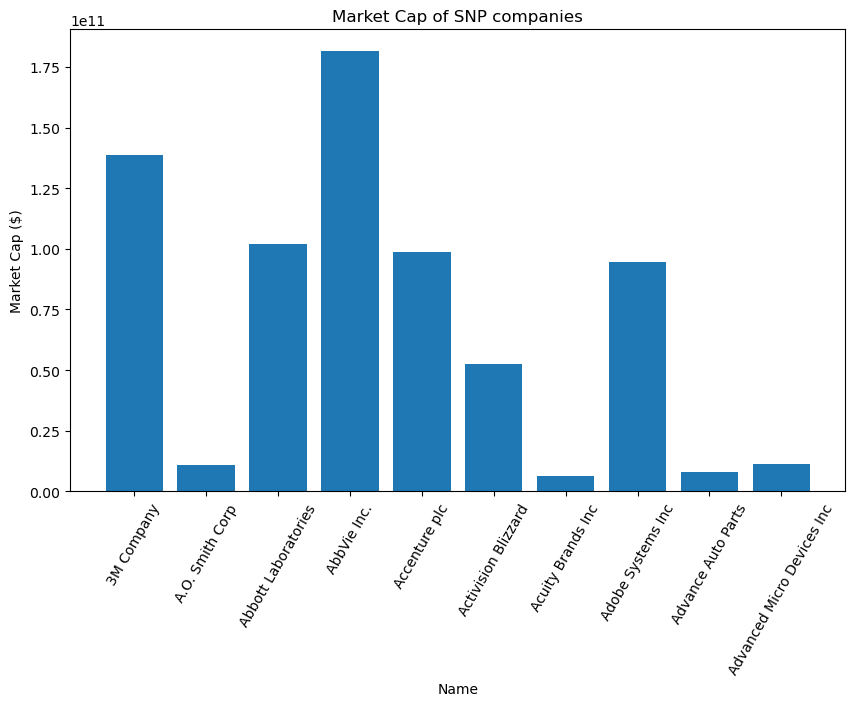

In [4]:
plt.figure(figsize=[10,6])
plt.bar(df["Name"][:10], df["Market Cap"][:10])
plt.title("Market Cap of SNP companies")
plt.ylabel("Market Cap ($)")
plt.xlabel("Name")
plt.xticks(rotation=60)
plt.show()

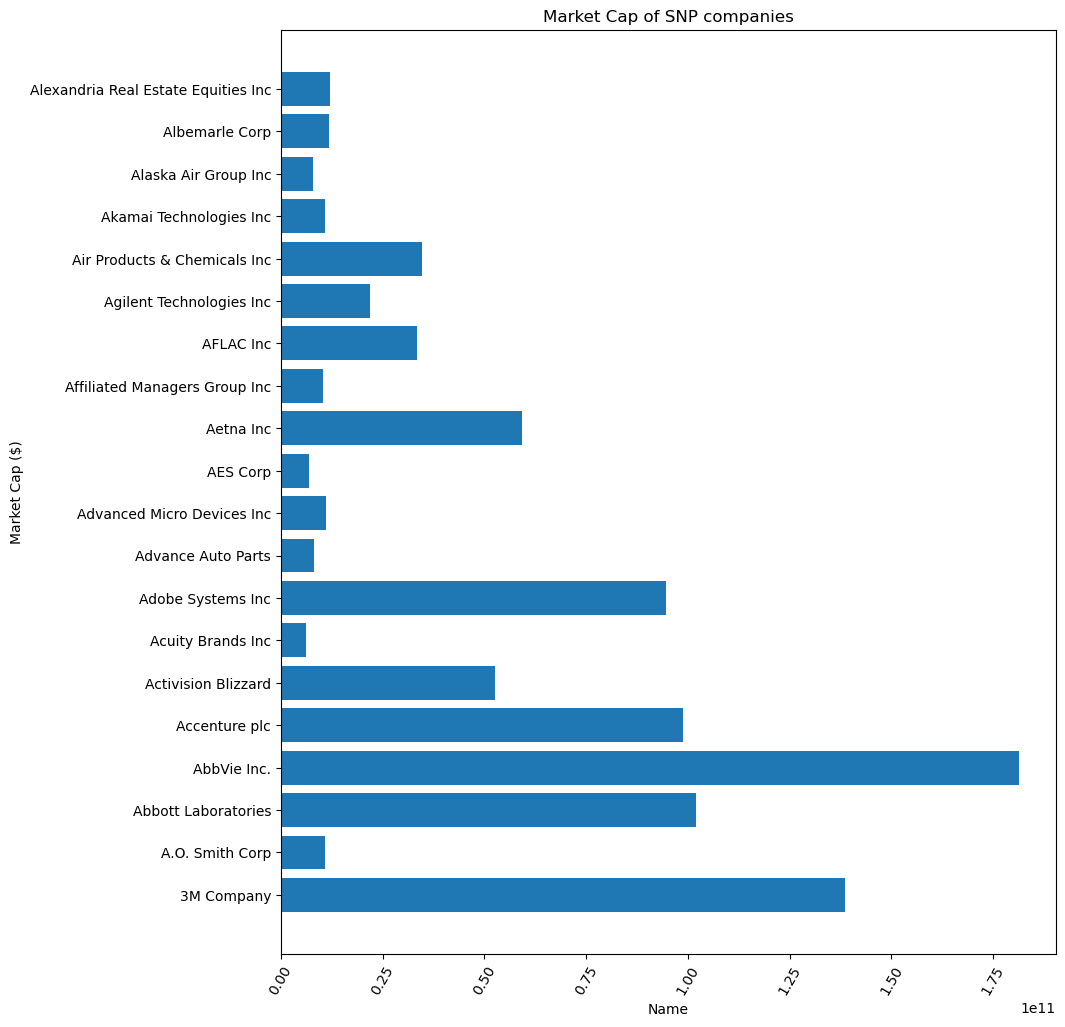

In [5]:
plt.figure(figsize=[10,12])
plt.barh(df["Name"][:20], df["Market Cap"][:20])
plt.title("Market Cap of SNP companies")
plt.ylabel("Market Cap ($)")
plt.xlabel("Name")
plt.xticks(rotation=60)
plt.show()

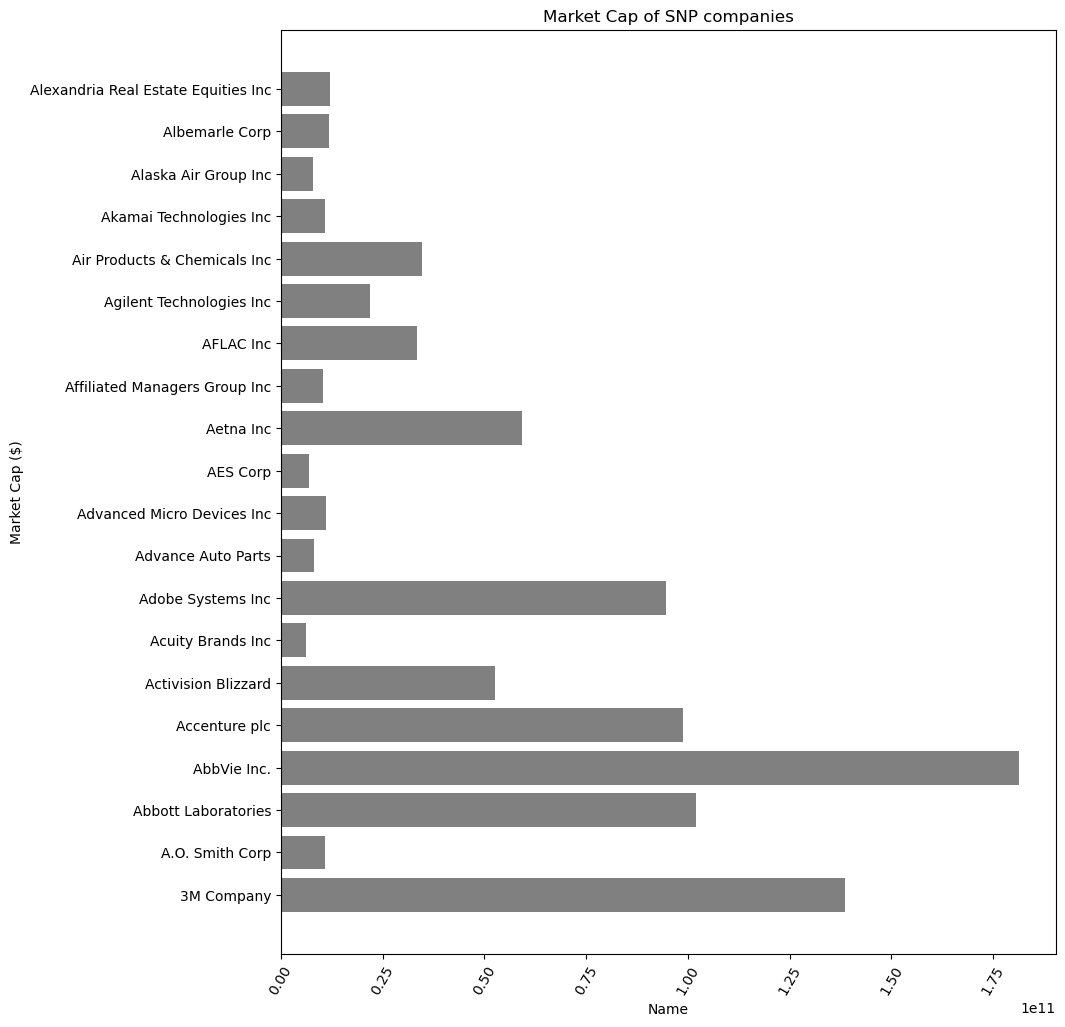

In [6]:
plt.figure(figsize=[10,12])
plt.barh(df["Name"][:20], df["Market Cap"][:20], color="grey")
plt.title("Market Cap of SNP companies")
plt.ylabel("Market Cap ($)")
plt.xlabel("Name")
plt.xticks(rotation=60)
plt.show()

In [7]:
data =  yf.download(tickers=['AAPL'], start= '2024-01-01', end= '2024-06-30',group_by= 'Ticker')

C:\Users\emmanuel.osademe\AppData\Local\Temp\ipykernel_4764\1870766418.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data =  yf.download(tickers=['AAPL'], start= '2024-01-01', end= '2024-06-30',group_by= 'Ticker')
[*********************100%***********************]  1 of 1 completed


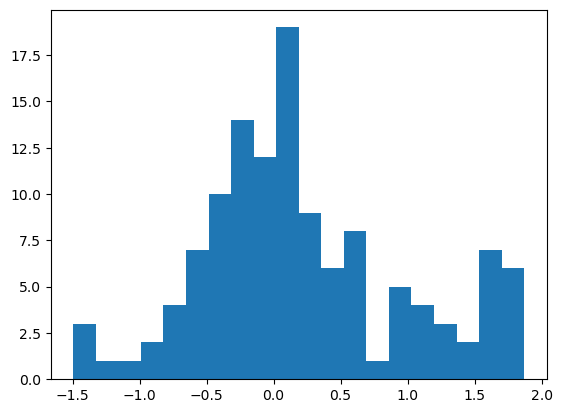

In [8]:
# Calculate the MACD and Signal Line
data['EMA_12'] = data["AAPL"]['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data["AAPL"]['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']

plt.hist(data['MACD_Histogram'],bins=20)
plt.show()

In [9]:
df["Sector"].value_counts()

Sector
Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: count, dtype: int64

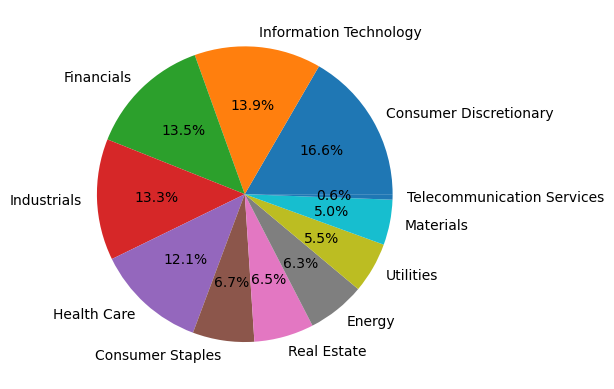

In [10]:
sectors = df["Sector"].value_counts()
plt.pie(sectors, labels=sectors.index, autopct='%1.1f%%')
plt.show()

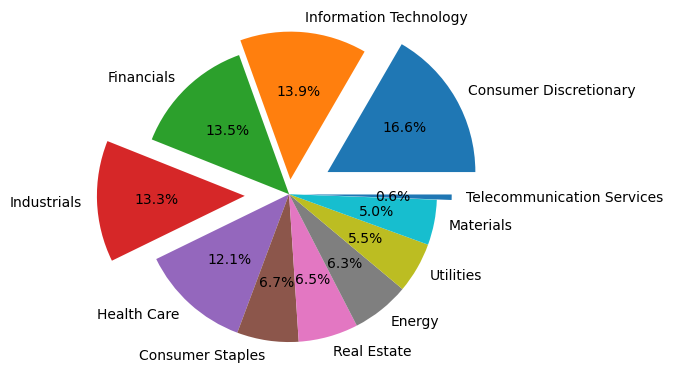

In [11]:
explode_list = [0.3,0.1,0,0.3,0,0,0,0,0,0,0.1]
plt.pie(sectors, labels=sectors.index, autopct='%1.1f%%', explode=explode_list)
plt.show()

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [13]:
plt.style.use('_mpl-gallery')

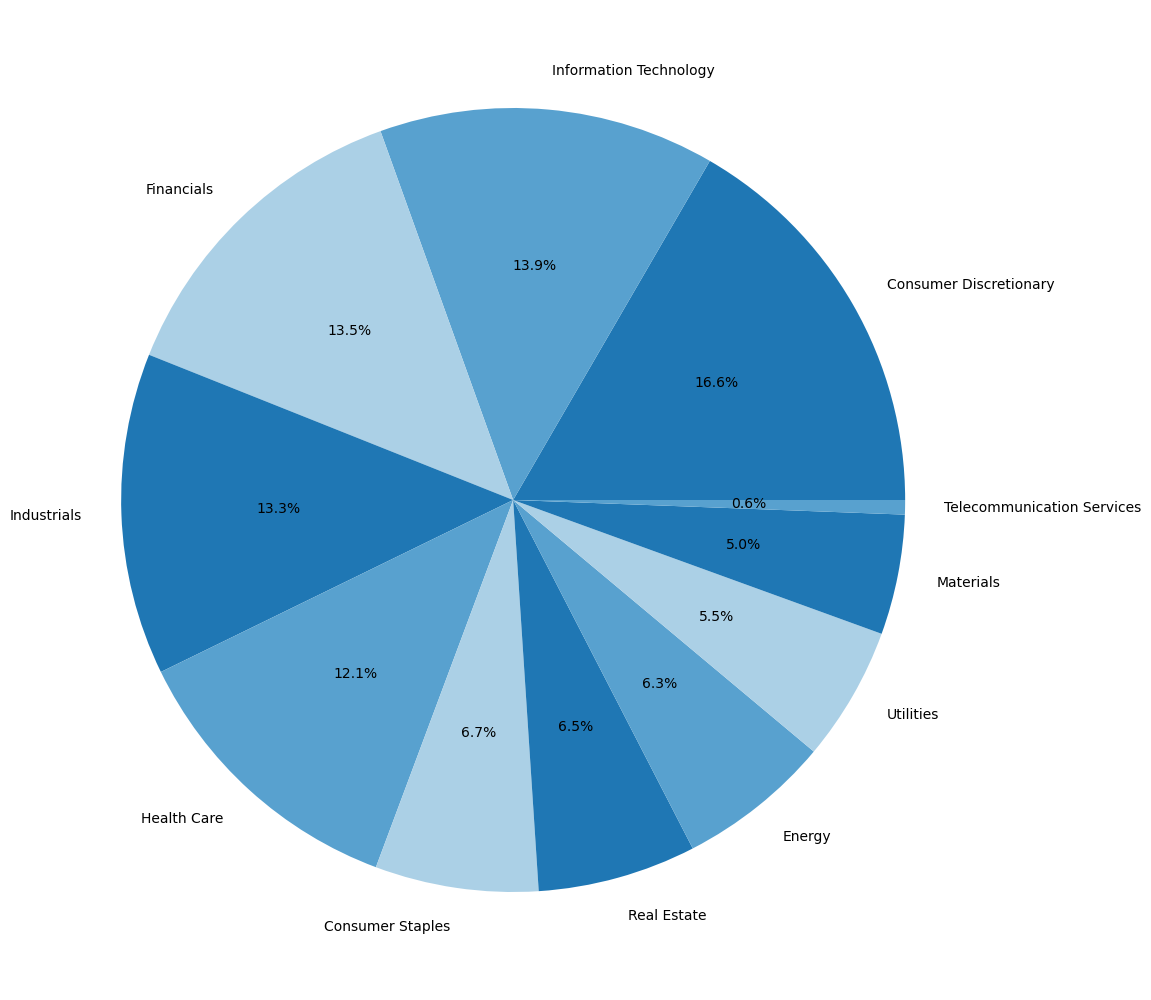

In [14]:
plt.figure(figsize=[10,10])
plt.pie(sectors, labels=sectors.index, autopct='%1.1f%%')
plt.savefig("files/charts/industries.png")